<a href="https://colab.research.google.com/github/Abhishek-pandit2026/CodAlpha_Task/blob/main/Stock_Price_Prediction_using_LSTM_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task_1 From CODALPHA**

# **Import Library**

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# **Loading the Dataset**

In [10]:
data = pd.read_csv("/content/Stock prediction  dataset.csv")
print(data.head(10))
print(data.columns)

  Company        Date Close/Last    Volume      Open       High       Low
0    AAPL  07/17/2023    $193.99  50520160   $191.90    $194.32   $191.81
1    AAPL  07/14/2023    $190.69  41616240   $190.23  $191.1799   $189.63
2    AAPL  07/13/2023    $190.54  41342340   $190.50    $191.19   $189.78
3    AAPL  07-12-2023    $189.77  60750250   $189.68    $191.70   $188.47
4    AAPL  07-11-2023    $188.08  46638120   $189.16    $189.30   $186.60
5    AAPL  07-10-2023    $188.61  59922160   $189.26    $189.99  $187.035
6    AAPL  07-07-2023    $190.68  46815000   $191.41    $192.67   $190.24
7    AAPL  07-06-2023    $191.81  45156010   $189.84    $192.02   $189.20
8    AAPL  07-05-2023    $191.33  46920260  $191.565    $192.98   $190.62
9    AAPL  07-03-2023    $192.46  31346600   $193.78    $193.88   $191.76
Index(['Company', 'Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low'], dtype='object')


In [11]:
data.shape

(25160, 7)

In [12]:
data.info

<bound method DataFrame.info of       Company        Date Close/Last    Volume      Open       High       Low
0        AAPL  07/17/2023    $193.99  50520160   $191.90    $194.32   $191.81
1        AAPL  07/14/2023    $190.69  41616240   $190.23  $191.1799   $189.63
2        AAPL  07/13/2023    $190.54  41342340   $190.50    $191.19   $189.78
3        AAPL  07-12-2023    $189.77  60750250   $189.68    $191.70   $188.47
4        AAPL  07-11-2023    $188.08  46638120   $189.16    $189.30   $186.60
...       ...         ...        ...       ...       ...        ...       ...
25155    NFLX  07/24/2013   $34.4714  33395351  $35.6743   $36.0357  $34.3143
25156    NFLX  07/23/2013   $35.7514  76792963  $35.9143   $37.4621  $35.1714
25157    NFLX  07/22/2013   $37.4228  44791095  $38.1214   $38.3928  $36.7314
25158    NFLX  07/19/2013   $37.7966  18098750  $38.2043   $38.2784  $37.5971
25159    NFLX  07/18/2013   $38.0586  20418642  $38.6157   $38.6157  $37.7143

[25160 rows x 7 columns]>

In [13]:
data.head()

,Company,Date,Close/Last,Volume,Open,High,Low
0,AAPL,07/17/2023,$193.99,50520160,$191.90,$194.32,$191.81
1,AAPL,07/14/2023,$190.69,41616240,$190.23,$191.1799,$189.63
2,AAPL,07/13/2023,$190.54,41342340,$190.50,$191.19,$189.78
3,AAPL,07-12-2023,$189.77,60750250,$189.68,$191.70,$188.47
4,AAPL,07-11-2023,$188.08,46638120,$189.16,$189.30,$186.60


In [14]:
data.isnull().sum()

,0
Company,0
Date,0
Close/Last,0
Volume,0
Open,0
High,0
Low,0


In [15]:
data.duplicated().sum()

0

In [16]:
data.describe()

,Volume
count,2.516000e+04
mean,5.131764e+07
std,6.399143e+07
min,1.143952e+06
25%,1.200394e+07
50%,2.672083e+07
75%,6.857269e+07
max,1.065209e+09


In [17]:
data.dtypes

,0
Company,object
Date,object
Close/Last,object
Volume,int64
Open,object
High,object
Low,object


In [18]:
from os import replace
data = pd.DataFrame(data)

data["Date"] = data["Date"].astype(str).str.replace('-', '/')
data["Date"] = pd.to_datetime(data["Date"], format='%m/%d/%Y') # Changed the format string

numeric_columns = ['Close/Last', 'Open', 'High', 'Low']
data[numeric_columns] = data[numeric_columns].replace('[\$,]', '', regex=True).astype(float)



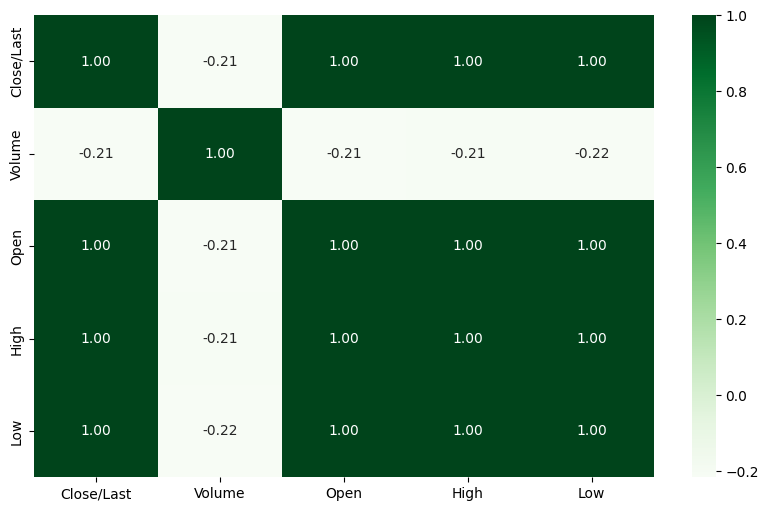

In [19]:
# Select only numeric columns before calculating correlations
numeric_data = data.select_dtypes(include=['number'])
plt.figure(figsize=(10,6))
sns.heatmap(numeric_data.corr(), fmt=".2f", annot=True, cmap='Greens')
plt.show()

In [22]:
# Extract the year from the 'Date' column
data["Year"] = data["Date"].dt.year

# Now you can plot using the 'Year' column
fig = px.line(data, x="Year", y=["High","Low"],title="Stocks High and Low Values Over Time")
fig.show()

In [23]:
# Check if 'Date' column exists before dropping
if 'Date' in data.columns:
    data = data.drop(columns=['Date'])
else:
    print("Column 'Date' not found in DataFrame.")

# **Ploting the closing price of the stock to visualize the trend**

In [24]:
# Check if 'Close' column exists before plotting
if 'Close' in data.columns:
    plt.figure(figsize=(16, 8))
    plt.title('Close Price History')
    plt.plot(data['Close'])
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price ()', fontsize=18)
    plt.show()
else:
    print("Column 'Close' not found in DataFrame. It might have been removed accidentally.")

Column 'Close' not found in DataFrame. It might have been removed accidentally.


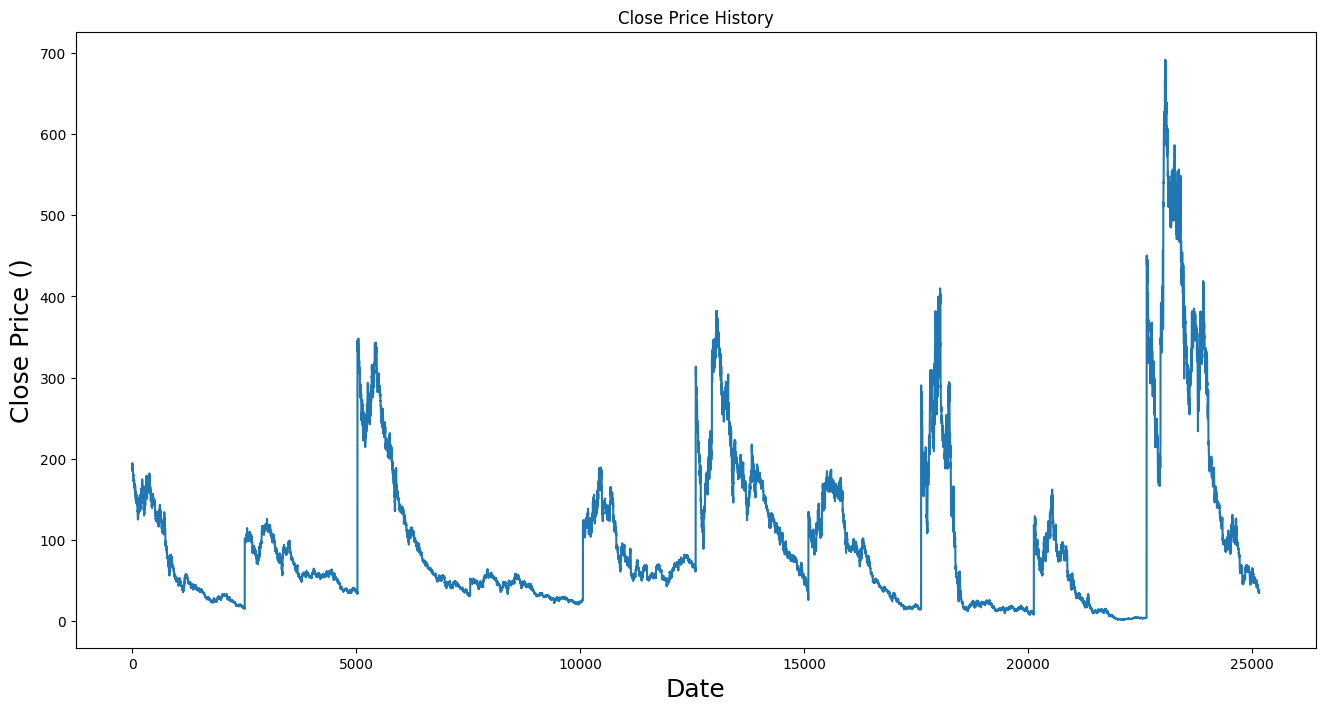

In [25]:
plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(data['Close/Last'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ()', fontsize=18)
plt.show()

# **We need to preprocess the data before feeding it into the LSTM.**

In [26]:
data = data.filter(['Close/Last']).values
data

array([[193.99  ],
       [190.69  ],
       [190.54  ],
       ...,
       [ 37.4228],
       [ 37.7966],
       [ 38.0586]])

# **We Will normalize the data between 0 and 1 using the minmaxscaler:**

In [27]:
!pip install scikit-learn  # Install scikit-learn if you haven't already

from sklearn.preprocessing import MinMaxScaler # Import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaler_data = scaler.fit_transform(data)

In [28]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler_data = scaler.fit_transform(data)

# **To Train the Dataset**

In [29]:
train_data = scaler_data[:int(len(scaler_data)*0.8)]
x_train_list = []  # Use a list to store values temporarily
y_train_list = []

for i in range(60,len(train_data)):
  x_train_list.append(train_data[i-60:i,0])
  y_train_list.append(train_data[i,0])

# Convert lists to NumPy arrays after the loop
x_train = np.array(x_train_list)
y_train = np.array(y_train_list)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

# **Build the LSTM Model**

In [30]:
from keras.models import Sequential # Import the Sequential class
from keras.layers import LSTM, Dropout, Dense # Import necessary layers

model = Sequential() # Use the imported Sequential class
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2)) # Correct typo here, should be 0.2
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2)) # Correct typo here as well
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, epochs=50, batch_size=32)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/50
628/628 ━━━━━━━━━━━━━━━━━━━━ 74s 95ms/step - loss: 0.0130
Epoch 2/50
628/628 ━━━━━━━━━━━━━━━━━━━━ 64s 66ms/step - loss: 0.0118
Epoch 3/50
628/628 ━━━━━━━━━━━━━━━━━━━━ 81s 65ms/step - loss: 0.0117
Epoch 4/50
628/628 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - loss: 0.0117
Epoch 5/50
628/628 ━━━━━━━━━━━━━━━━━━━━ 41s 64ms/step - loss: 0.0120
Epoch 6/50
628/628 ━━━━━━━━━━━━━━━━━━━━ 41s 64ms/step - loss: 0.0120
Epoch 7/50
628/628 ━━━━━━━━━━━━━━━━━━━━ 41s 64ms/step - loss: 0.0120
Epoch 8/50
628/628 ━━━━━━━━━━━━━━━━━━━━ 39s 63ms/step - loss: 0.0117
Epoch 9/50
628/628 ━━━━━━━━━━━━━━━━━━━━ 50s 77ms/step - loss: 0.0118
Epoch 10/50
628/628 ━━━━━━━━━━━━━━━━━━━━ 77s 69ms/step - loss: 0.0117
Epoch 11/50
628/628 ━━━━━━━━━━━━━━━━━━━━ 79s 65ms/step - loss: 0.0118
Epoch 12/50
628/628 ━━━━━━━━━━━━━━━━━━━━ 81s 64ms/step - loss: 0.0116
Epoch 13/50
628/628 ━━━━━━━━━━━━━━━━━━━━ 40s 63ms/step - loss: 0.0116
Epoch 14/50
628/628 ━━━━━━━━━━━━━━━━━━━━ 43s 67ms/step - loss: 0.0117
Epoch 15/50
628/628 ━━━━━━━━━

# **prediction on the test data**

In [33]:
test_data = scaler_data[int(len(scaler_data)*0.8)-60:]
x_test = []
y_test = data[int(len(scaler_data)*0.8):, :]

for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

predictions = model.predict(x_test)
# Reshape predictions to 2D before inverse scaling
predictions = predictions.reshape(predictions.shape[0], predictions.shape[1])
predictions = scaler.inverse_transform(predictions)

158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step


# **Visualizing the Prediction price as compared to Actual price**

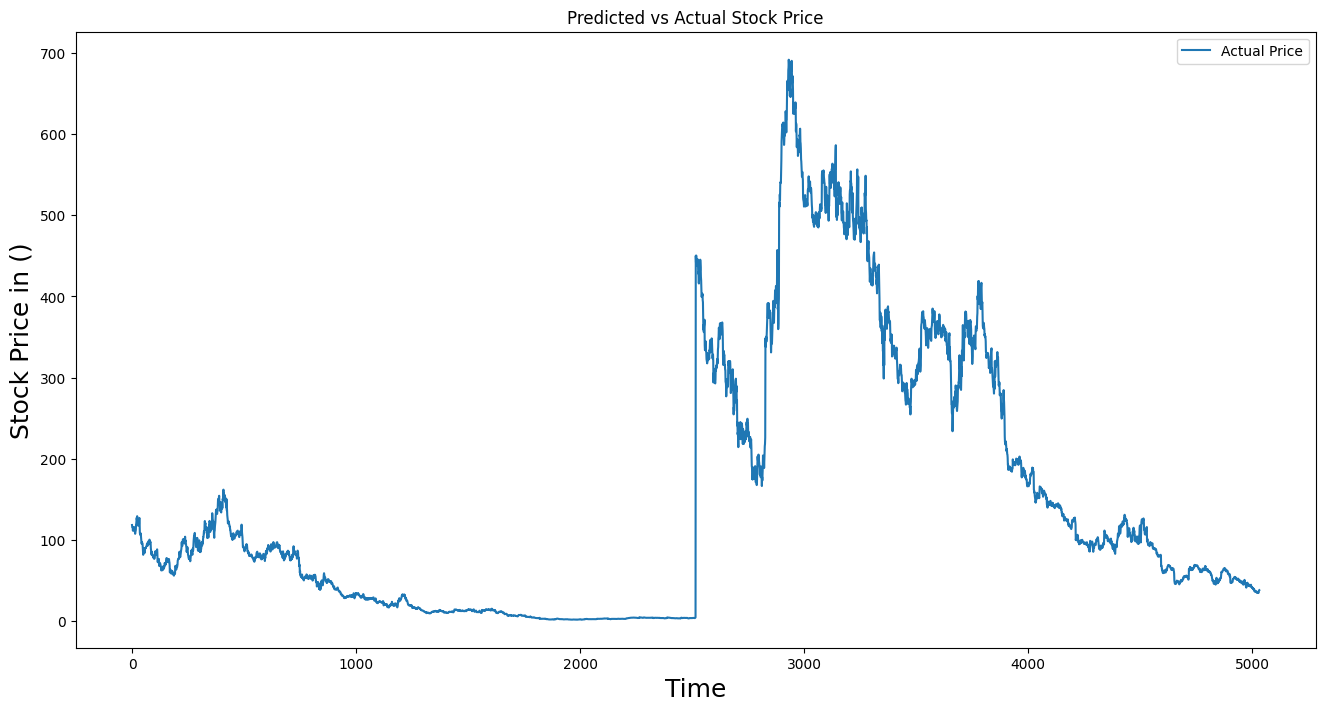

In [34]:
plt.figure(figsize=(16,8))
plt.title('Predicted vs Actual Stock Price')
plt.plot(y_test, label='Actual Price')
plt.xlabel('Time', fontsize=18)
plt.ylabel('Stock Price in ()', fontsize=18)
plt.legend()
plt.show()